# Machine Learning with caret in R

# DATACAMP

In [1]:
options(warn=-1)

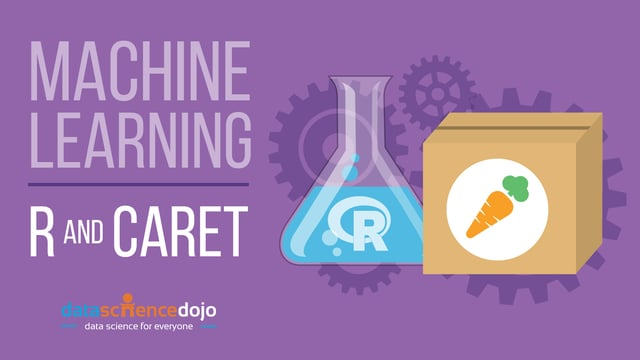

In [2]:
library("IRdisplay")
display_png(file="r&c.jpg") 

In [4]:
#install.packages("caret")

In [6]:
library(caret)

# Course Description
Machine learning is the study and application of algorithms that learn from and make predictions on data. From search results to self-driving cars, it has manifested itself in all areas of our lives and is one of the most exciting and fast growing fields of research in the world of data science. This course teaches the big ideas in machine learning: how to build and evaluate predictive models, how to tune them for optimal performance, how to preprocess data for better results, and much more. The popular caret R package, which provides a consistent interface to all of R's most powerful machine learning facilities, is used throughout the course.

# 1. Regression models: fitting them and evaluating their performance

In the first chapter of this course, you'll fit regression models with train() and evaluate their out-of-sample performance using cross-validation and root-mean-square error (RMSE).

In [7]:
# In-sample RMSE for linear regression on diamonds
# 
# As you saw in the video, included in the course is the diamonds dataset, 
# which is a classic dataset from the ggplot2 package. 
# The dataset contains physical attributes of diamonds as well as the price they sold for. 
# One interesting modeling challenge is predicting diamond price based on their attributes 
# using something like a linear regression.
# 
# Recall that to fit a linear regression, you use the lm() function in the following format:
# 
# mod <- lm(y ~ x, my_data)
# To make predictions using mod on the original data, you call the predict() function:
# 
# pred <- predict(mod, my_data)
# 
# Instructions
# 
# Fit a linear model on the diamonds dataset predicting price using 
# all other variables as predictors (i.e. price ~ .). 
# Save the result to model.
# Make predictions using model on the full original dataset and save the result to p.
# Compute errors using the formula errors=predicted−actual. Save the result to error.
# Compute RMSE using the formula you learned in the video and print it to the console.

In [8]:
library(ggplot2)

In [9]:
load('Diamonds.RData')

In [10]:
# Fit lm model: model
model <- lm(price ~ ., diamonds)

# Predict on full data: p
p <- predict(model, diamonds)

# Compute errors: error
error <- p - diamonds[["price"]]

# Calculate RMSE
sqrt(mean(error ^ 2))

[1] 1129.843

In [11]:
# Randomly order the data frame
# 
# One way you can take a train/test split of a dataset is to order the dataset randomly, 
# then divide it into the two sets. This ensures that the training set and test set are both 
# random samples and that any biases in the ordering of the dataset 
# (e.g. if it had originally been ordered by price or size) are not retained in the samples 
# we take for training and testing your models. 
# You can think of this like shuffling a brand new deck of playing cards before dealing hands.
# 
# First, you set a random seed so that your work is reproducible and 
# you get the same random split each time you run your script:
# 
# set.seed(42)
# Next, you use the sample() function to shuffle the row indices of the diamonds dataset. 
# You can later use these indices to reorder the dataset.
# 
# rows <- sample(nrow(diamonds))
# Finally, you can use this random vector to reorder the diamonds dataset:
# 
# diamonds <- diamonds[rows, ]
# Instructions
# 
# Set the random seed to 42.
# Make a vector of row indices called rows.
# Randomly reorder the diamonds data frame, assigning to shuffled_diamonds.

In [12]:
# Set seed
set.seed(42)

# Shuffle row indices: rows
rows <- sample(nrow(diamonds))

# Randomly order data
shuffled_diamonds <- diamonds[rows, ]

In [13]:
# Try an 80/20 split
# 
# Now that your dataset is randomly ordered, you can split the first 80% of it into a training set, 
# and the last 20% into a test set. You can do this by choosing a split point 
# approximately 80% of the way through your data:
# 
# split <- round(nrow(mydata) * 0.80)
# You can then use this point to break off the first 80% of the dataset as a training set:
# 
# mydata[1:split, ]
# And then you can use that same point to determine the test set:
# 
# mydata[(split + 1):nrow(mydata), ]
# Instructions
# 
# Choose a row index to split on so that the split point is approximately 80% of 
# the way through the diamonds dataset. Call this index split.
# Create a training set called train using that index.
# Create a test set called test using that index.

In [14]:
# Determine row to split on: split
split <- round(nrow(diamonds) * 0.80)

# Create train
train <- diamonds[1:split, ]

# Create test
test <- diamonds[(split + 1):nrow(diamonds), ]

In [15]:
# Predict on test set
# 
# Now that you have a randomly split training set and test set, 
# you can use the lm() function as you did in the first exercise to fit a model to your training set, 
# rather than the entire dataset. Recall that you can use the formula interface to 
# the linear regression function to fit a model with a specified target variable using 
# all other variables in the dataset as predictors:
# 
# mod <- lm(y ~ ., training_data)
# You can use the predict() function to make predictions from that model on new data. 
# The new dataset must have all of the columns from the training data, 
# but they can be in a different order with different values. 
# Here, rather than re-predicting on the training set, you can predict on the test set, 
# which you did not use for training the model. 
# This will allow you to determine the out-of-sample error for the model in the next exercise:
# 
# p <- predict(model, new_data)
# 
# Instructions
# 
# Fit an lm() model called model to predict price using all other variables as covariates. 
# Be sure to use the training set, train.
# Predict on the test set, test, using predict(). Store these values in a vector called p.

In [16]:
# Fit lm model on train: model
model <- lm(price ~ ., train)

# Predict on test: p
p <- predict(model, test)

In [17]:
# Calculate test set RMSE by hand
# 
# Now that you have predictions on the test set, you can use these predictions to calculate an error metric 
# (in this case RMSE) on the test set and see how the model performs out-of-sample, 
# rather than in-sample as you did in the first exercise. 
# You first do this by calculating the errors between the predicted diamond prices and 
# the actual diamond prices by subtracting the predictions from the actual values.
# 
# Once you have an error vector, calculating RMSE is as simple as squaring it, 
# taking the mean, then taking the square root:
# 
# sqrt(mean(error^2))
# 
# Instructions
# 
# test, model, and p are loaded in your workspace.
# 
# Calculate the error between the predictions on the test set and 
# the actual diamond prices in the test set. Call this error.
# Calculate RMSE using this error vector, just printing the result to the console.

In [18]:
# Compute errors: error
error <- p - test[["price"]]

# Calculate RMSE
sqrt(mean(error^2))

[1] 796.8922

In [19]:
# 10-fold cross-validation
# 
# As you saw in the video, a better approach to validating models is to use multiple systematic test sets, 
# rather than a single random train/test split. Fortunately, the caret package makes this very easy to do:
# 
# model <- train(y ~ ., my_data)
# caret supports many types of cross-validation, and you can specify which type of cross-validation and 
# the number of cross-validation folds with the trainControl() function, 
# which you pass to the trControl argument in train():
# 
# model <- train(
#   y ~ ., 
#   my_data,
#   method = "lm",
#   trControl = trainControl(
#     method = "cv", 
#     number = 10,
#     verboseIter = TRUE
#   )
# )
# It's important to note that you pass the method for modeling to the main train() function 
# and the method for cross-validation to the trainControl() function.
# 
# Instructions
# 
# Fit a linear regression to model price using all other variables in the diamonds dataset as predictors. 
# Use the train() function and 10-fold cross-validation. 
# (Note that we've taken a subset of the full diamonds dataset to speed up this operation, but it's still named diamonds.)
# Print the model to the console and examine the results.

In [20]:
# Fit lm model using 10-fold CV: model
model <- train(
  price ~ ., 
  diamonds,
  method = "lm",
  trControl = trainControl(
    method = "cv", 
    number = 10,
    verboseIter = TRUE
  )
)

# Print model to console
model

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

53940 samples
    9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48547, 48546, 48546, 48547, 48545, 48547, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1131.015  0.9196398  740.6117

Tuning parameter 'intercept' was held constant at a value of TRUE

In [21]:
# 5-fold cross-validation
# 
# In this course, you will use a wide variety of datasets to explore 
# the full flexibility of the caret package. 
# Here, you will use the famous Boston housing dataset, 
# where the goal is to predict median home values in various Boston suburbs.
# 
# You can use exactly the same code as in the previous exercise, but change the dataset used by the model:
# 
# model <- train(
#   medv ~ ., 
#   Boston, # <- new!
#   method = "lm",
#   trControl = trainControl(
#     method = "cv", 
#     number = 10,
#     verboseIter = TRUE
#   )
# )
# Next, you can reduce the number of cross-validation folds from 10 to 5 using 
# the number argument to the trainControl() argument:
# 
# trControl = trainControl(
#   method = "cv", 
#   number = 5,
#   verboseIter = TRUE
# )
# Instructions
# 
# Fit an lm() model to the Boston housing dataset, 
# such that medv is the response variable and all other variables are explanatory variables.
# Use 5-fold cross-validation rather than 10-fold cross-validation.
# Print the model to the console and inspect the results.

In [22]:
library(MASS)
Boston<-Boston

In [23]:
# Fit lm model using 5-fold CV: model
model <- train(
  medv ~ ., 
  Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", 
    number = 5,
    verboseIter = TRUE
  )
)

# Print model to console
model

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 405, 406, 403, 405 
Resampling results:

  RMSE      Rsquared   MAE     
  4.860247  0.7209221  3.398114

Tuning parameter 'intercept' was held constant at a value of TRUE

In [24]:
# Making predictions on new data
# 
# Finally, the model you fit with the train() function has the exact same predict() 
# interface as the linear regression models you fit earlier in this chapter.
# 
# After fitting a model with train(), you can simply call predict() with new data, e.g:
# 
# predict(my_model, new_data)
# 
# Instructions
# 
# Use the predict() function to make predictions with model on the full Boston housing dataset. 
# Print the result to the console.

In [25]:
# Predict on full Boston dataset
predict(model, Boston)

1          2          3          4          5          6          7 
30.0038434 25.0255624 30.5675967 28.6070365 27.9435242 25.2562845 23.0018083 
         8          9         10         11         12         13         14 
19.5359884 11.5236369 18.9202621 18.9994965 21.5867957 20.9065215 19.5529028 
        15         16         17         18         19         20         21 
19.2834821 19.2974832 20.5275098 16.9114013 16.1780111 18.4061360 12.5238575 
        22         23         24         25         26         27         28 
17.6710367 15.8328813 13.8062853 15.6783383 13.3866856 15.4639765 14.7084743 
        29         30         31         32         33         34         35 
19.5473729 20.8764282 11.4551176 18.0592329  8.8110574 14.2827581 13.7067589 
        36         37         38         39         40         41         42 
23.8146353 22.3419371 23.1089114 22.9150261 31.3576257 34.2151023 28.0205641 
        43         44         45         46         47         48         49 
25.2038663 24.6097927 22.9414918 22.0966982 20.4232003 18.0365509  9.1065538 
        50         51         52         53         54         55         56 
17.2060775 21.2815254 23.9722228 27.6558508 24.0490181 15.3618477 31.1526495 
        57         58         59         60         61         62         63 
24.8568698 33.1091981 21.7753799 21.0849356 17.8725804 18.5111021 23.9874286 
        64         65         66         67         68         69         70 
22.5540887 23.3730864 30.3614836 25.5305651 21.1133856 17.4215379 20.7848363 
        71         72         73         74         75         76         77 
25.2014886 21.7426577 24.5574496 24.0429571 25.5049972 23.9669302 22.9454540 
        78         79         80         81         82         83         84 
23.3569982 21.2619827 22.4281737 28.4057697 26.9948609 26.0357630 25.0587348 
        85         86         87         88         89         90         91 
24.7845667 27.7904920 22.1685342 25.8927642 30.6746183 30.8311062 27.1190194 
        92         93         94         95         96         97         98 
27.4126673 28.9412276 29.0810555 27.0397736 28.6245995 24.7274498 35.7815952 
        99        100        101        102        103        104        105 
35.1145459 32.2510280 24.5802202 25.5941347 19.7901368 20.3116713 21.4348259 
       106        107        108        109        110        111        112 
18.5399401 17.1875599 20.7504903 22.6482911 19.7720367 20.6496586 26.5258674 
       113        114        115        116        117        118        119 
20.7732364 20.7154831 25.1720888 20.4302559 23.3772463 23.6904326 20.3357836 
       120        121        122        123        124        125        126 
20.7918087 21.9163207 22.4710778 20.5573856 16.3666198 20.5609982 22.4817845 
       127        128        129        130        131        132        133 
14.6170663 15.1787668 18.9386859 14.0557329 20.0352740 19.4101340 20.0619157 
       134        135        136        137        138        139        140 
15.7580767 13.2564524 17.2627773 15.8784188 19.3616395 13.8148390 16.4488147 
       141        142        143        144        145        146        147 
13.5714193  3.9888551 14.5949548 12.1488148  8.7282236 12.0358534 15.8208206 
       148        149        150        151        152        153        154 
 8.5149902  9.7184414 14.8045137 20.8385815 18.3010117 20.1228256 17.2860189 
       155        156        157        158        159        160        161 
22.3660023 20.1037592 13.6212589 33.2598270 29.0301727 25.5675277 32.7082767 
       162        163        164        165        166        167        168 
36.7746701 40.5576584 41.8472817 24.7886738 25.3788924 37.2034745 23.0874875 
       169        170        171        172        173        174        175 
26.4027396 26.6538211 22.5551466 24.2908281 22.9765722 29.0719431 26.5219434 
       176        177        178        179        180        181        182 
30.7220906 25.6166931 29.137409

# 2. Classification models: fitting them and evaluating their performance

In this chapter, you'll fit classification models with train() and evaluate their out-of-sample performance using cross-validation and area under the curve (AUC).

In [26]:
# Try a 60/40 split
# 
# As you saw in the video, you'll be working with the Sonar dataset in this chapter, 
# using a 60% training set and a 40% test set. 
# We'll practice making a train/test split one more time, just to be sure you have the hang of it. 
# Recall that you can use the sample() function to get a random permutation of the row indices in a dataset, 
# to use when making train/test splits, e.g.:
# 
# n_obs <- nrow(my_data)
# permuted_rows <- sample(n_obs)
# And then use those row indices to randomly reorder the dataset, e.g.:
# 
# my_data <- my_data[permuted_rows, ]
# Once your dataset is randomly ordered, you can split off the first 60% as a training set and the last 40% as a test set.
# 
# Instructions
# 
# Get the number of observations (rows) in Sonar, assigning to n_obs.
# Shuffle the row indices of Sonar and store the result in permuted_rows.
# Use permuted_rows to randomly reorder the rows of Sonar, saving as Sonar_shuffled.
# Identify the proper row to split on for a 60/40 split. Store this row number as split.
# Save the first 60% of Sonar_shuffled as a training set.
# Save the last 40% of Sonar_shuffled as the test set.

In [28]:
#install.packages('mlbench')

In [30]:
library(mlbench)
data(Sonar)
# Shuffle row indices: rows
set.seed(421)
rows <- sample(nrow(Sonar))

# • Use rows to randomly reorder the rows of Sonar.
# Randomly order data
Sonar <- Sonar[rows, ]
# • Identify the proper row to split on for a 60/40 split. Store this row number as split.
# Identify row to split on: split
split <- round(nrow(Sonar)*.60, 0)
split

# • Save the fi rst 60% as a training set.
# Create train
train <- Sonar[1:split, ]
# • Save the last 40% as the test set.
# Create test
test <- Sonar[(split+1):nrow(Sonar), ]

[1] 125

In [31]:
# Fit a logistic regression model
# 
# Once you have your random training and test sets you can fit a logistic regression model 
# to your training set using the glm() function. glm() is a more advanced version of lm() that allows 
# for more varied types of regression models, aside from plain vanilla ordinary least squares regression.
# 
# Be sure to pass the argument family = "binomial" to glm() to specify that you want to do logistic 
# (rather than linear) regression. For example:
# 
# glm(Target ~ ., family = "binomial", dataset)
# 
# Don't worry about warnings like glm.fit: algorithm did not converge or 
# glm.fit: fitted probabilities numerically 0 or 1 occurred. 
# These are common on smaller datasets and usually don't cause any issues. 
# They typically mean your dataset is perfectly separable, 
# which can cause problems for the math behind the model, 
# but R's glm() function is almost always robust enough to handle this case with no problems.
# 
# Once you have a glm() model fit to your dataset, you can predict the outcome (e.g. rock or mine) 
# on the test set using the predict() function with the argument type = "response":
# 
# predict(my_model, test, type = "response")
# Instructions
# 
# Fit a logistic regression called model to predict Class using all other variables as predictors. Use the training set for Sonar.
# Predict on the test set using that model. Call the result p like you've done before.

In [32]:
# Fit glm model: model
model <- glm(Class ~ ., data = train, family = "binomial")

#• Predict on the test set using that model. Call the result p like you’ve done before.
# Predict on test: p
p <- predict(model, newdata = test, type = "response")

In [33]:
# Calculate a confusion matrix
# 
# As you saw in the video, a confusion matrix is a very useful tool for calibrating 
# the output of a model and examining all possible outcomes of your predictions 
# (true positive, true negative, false positive, false negative).
# 
# Before you make your confusion matrix, you need to "cut" your predicted probabilities 
# at a given threshold to turn probabilities into a factor of class predictions. 
# Combine ifelse() with factor() as follows:
# 
# pos_or_neg <- ifelse(probability_prediction > threshold, positive_class, negative_class)
# p_class <- factor(pos_or_neg, levels = levels(test_values))
# confusionMatrix() in caret improves on table() from base R by adding lots of useful 
# ancillary statistics in addition to the base rates in the table. 
# You can calculate the confusion matrix (and the associated statistics) 
# using the predicted outcomes as well as the actual outcomes, e.g.:
# 
# confusionMatrix(p_class, test_values)
# Instructions
# 
# Use ifelse() to create a character vector, m_or_r that is the positive class, "M",
# when p is greater than 0.5, and the negative class, "R", otherwise.
# 
# Convert m_or_r to be a factor, p_class, with levels the same as those of test[["Class"]].
# Make a confusion matrix with confusionMatrix(), passing p_class and the "Class" column from the test dataset.

In [35]:
#install.packages('e1071')

In [36]:
library(e1071)

In [37]:
#• Use ifelse() to create a character vector, m_or_r that is the positive class, "M", when p is greater
#than 0.5, and the negative class, "R", otherwise.
library(caret)
# Calculate class probabilities: p_class
m_or_r <- ifelse(p > 0.50, "M", "R")

#• Convert m_or_r to be a factor, p_class, with levels the same as those of test[["Class"]].
#p_class <- factor(m_or_r, levels = levels(test[["Class"]]))
# OR
p_class <- factor(m_or_r, levels = c("M", "R"))

#• Make a confusion matrix with confusionMatrix(), passing p_class and the "Class" column from
#the test dataset.
# Create confusion matrix
caret::confusionMatrix(p_class, test$Class)

# Using table()
table(p_class, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  6 24
         R 34 19
                                          
               Accuracy : 0.3012          
                 95% CI : (0.2053, 0.4118)
    No Information Rate : 0.5181          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : -0.4117         
                                          
 Mcnemar's Test P-Value : 0.2373          
                                          
            Sensitivity : 0.15000         
            Specificity : 0.44186         
         Pos Pred Value : 0.20000         
         Neg Pred Value : 0.35849         
             Prevalence : 0.48193         
         Detection Rate : 0.07229         
   Detection Prevalence : 0.36145         
      Balanced Accuracy : 0.29593         
                                          
       'Positive' Class : M               
                                    

       
p_class  M  R
      M  6 24
      R 34 19

In [39]:
# Calculating accuracy—Use confusionMatrix(p_class, test[["Class"]]) to calculate a confusion matrix
# on the test set.
# • What is the test set accuracy of this model (rounded to the nearest percent)?
RES <- caret::confusionMatrix(p_class, test[["Class"]])
RES

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  6 24
         R 34 19
                                          
               Accuracy : 0.3012          
                 95% CI : (0.2053, 0.4118)
    No Information Rate : 0.5181          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : -0.4117         
                                          
 Mcnemar's Test P-Value : 0.2373          
                                          
            Sensitivity : 0.15000         
            Specificity : 0.44186         
         Pos Pred Value : 0.20000         
         Neg Pred Value : 0.35849         
             Prevalence : 0.48193         
         Detection Rate : 0.07229         
   Detection Prevalence : 0.36145         
      Balanced Accuracy : 0.29593         
                                          
       'Positive' Class : M               
                                    

In [40]:
RES$overall[1]

Accuracy 
0.3012048

In [41]:
#• What is the test set true positive rate (or sensitivity) of this model (rounded to the nearest percent)?
Sens <- round(RES[[4]]["Sensitivity"]*100, 1)
Sens

Sensitivity 
         15

In [42]:
#• What is the test set true negative rate (or specifi city) of this model (rounded to the nearest percent)?
Spec <- round(RES[[4]]["Specificity"]*100, 1)
Spec

Specificity 
       44.2

In [43]:
# Try another threshold
# 
# In the previous exercises, you used a threshold of 0.50 to cut your predicted probabilities 
# to make class predictions (rock vs mine). However, this classification threshold does not always 
# align with the goals for a given modeling problem.
# 
# For example, pretend you want to identify the objects you are really certain are mines. 
# In this case, you might want to use a probability threshold of 0.90 to get fewer predicted mines, 
# but with greater confidence in each prediction.
# 
# The code pattern for cutting probabilities into predicted classes, then calculating a confusion matrix, 
# was shown in Exercise 7 of this chapter.
# 
# Instructions
# 
# Use ifelse() to create a character vector, m_or_r that is the positive class, "M", 
# when p is greater than 0.9, and the negative class, "R", otherwise.
# Convert m_or_r to be a factor, p_class, with levels the same as those of test[["Class"]].
# Make a confusion matrix with confusionMatrix(), passing p_class and the "Class" column from the test dataset.

In [44]:
#• Use ifelse() to create a character vector, m_or_r that is the positive class, "M", when p is greater
# than 0.9, and the negative class, "R", otherwise.
# Apply threshold of 0.9
m_or_r <- ifelse(p > 0.90, "M", "R")

#• Convert m_or_r to be a factor, p_class, with levels the same as those of test[["Class"]].
p_class <- factor(m_or_r, levels = levels(test[["Class"]]))

#• Make a confusion matrix with confusionMatrix(), passing p_class and the "Class" column from
# the test dataset.
# Create confusion matrix
confusionMatrix(p_class, test[["Class"]])

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  6 24
         R 34 19
                                          
               Accuracy : 0.3012          
                 95% CI : (0.2053, 0.4118)
    No Information Rate : 0.5181          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : -0.4117         
                                          
 Mcnemar's Test P-Value : 0.2373          
                                          
            Sensitivity : 0.15000         
            Specificity : 0.44186         
         Pos Pred Value : 0.20000         
         Neg Pred Value : 0.35849         
             Prevalence : 0.48193         
         Detection Rate : 0.07229         
   Detection Prevalence : 0.36145         
      Balanced Accuracy : 0.29593         
                                          
       'Positive' Class : M               
                                    

In [45]:
# From probabilites to confusion matrix
# 
# Conversely, say you want to be really certain that your model correctly identifies all the mines as mines. 
# In this case, you might use a prediction threshold of 0.10, instead of 0.90.
# 
# The code pattern for cutting probabilities into predicted classes, 
# then calculating a confusion matrix, was shown in Exercise 7 of this chapter.
# 
# Instructions
# 
# Use ifelse() to create a character vector, m_or_r that is 
# the positive class, "M", when p is greater than 0.1, and the negative class, "R", otherwise.
# Convert m_or_r to be a factor, p_class, with levels the same as those of test[["Class"]].
# Make a confusion matrix with confusionMatrix(), passing p_class and the "Class" column from the test dataset.

In [46]:
# # If p exceeds threshold of 0.1, M else R: m_or_r
m_or_r <- ifelse(p > 0.10, "M", "R")

# Convert to factor: p_class
p_class <- factor(m_or_r, levels = levels(test[["Class"]]))

# Create confusion matrix
confusionMatrix(p_class, test[["Class"]])

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  6 25
         R 34 18
                                          
               Accuracy : 0.2892          
                 95% CI : (0.1948, 0.3991)
    No Information Rate : 0.5181          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : -0.4348         
                                          
 Mcnemar's Test P-Value : 0.2976          
                                          
            Sensitivity : 0.15000         
            Specificity : 0.41860         
         Pos Pred Value : 0.19355         
         Neg Pred Value : 0.34615         
             Prevalence : 0.48193         
         Detection Rate : 0.07229         
   Detection Prevalence : 0.37349         
      Balanced Accuracy : 0.28430         
                                          
       'Positive' Class : M               
                                    

In [48]:
# Plot an ROC curve
# 
# As you saw in the video, an ROC curve is a really useful shortcut for summarizing 
# the performance of a classifier over all possible thresholds. 
# This saves you a lot of tedious work computing class predictions for many different thresholds 
# and examining the confusion matrix for each.
# 
# My favorite package for computing ROC curves is caTools, which contains a function called colAUC(). 
# This function is very user-friendly and can actually calculate ROC curves for multiple predictors at once. 
# In this case, you only need to calculate the ROC curve for one predictor, e.g.:
# 
# colAUC(predicted_probabilities, actual, plotROC = TRUE)
# The function will return a score called AUC (more on that later) and the plotROC = TRUE 
# argument will return the plot of the ROC curve for visual inspection.
# 
# Instructions
# model, test, and train from the last exercise using the sonar data are loaded in your workspace.
# 
# Predict probabilities (i.e. type = "response") on the test set, then store the result as p.
# Make an ROC curve using the predicted test set probabilities.

In [48]:
#install.packages('caTools')

In [49]:
library(caTools)

M vs. R,0.7520349


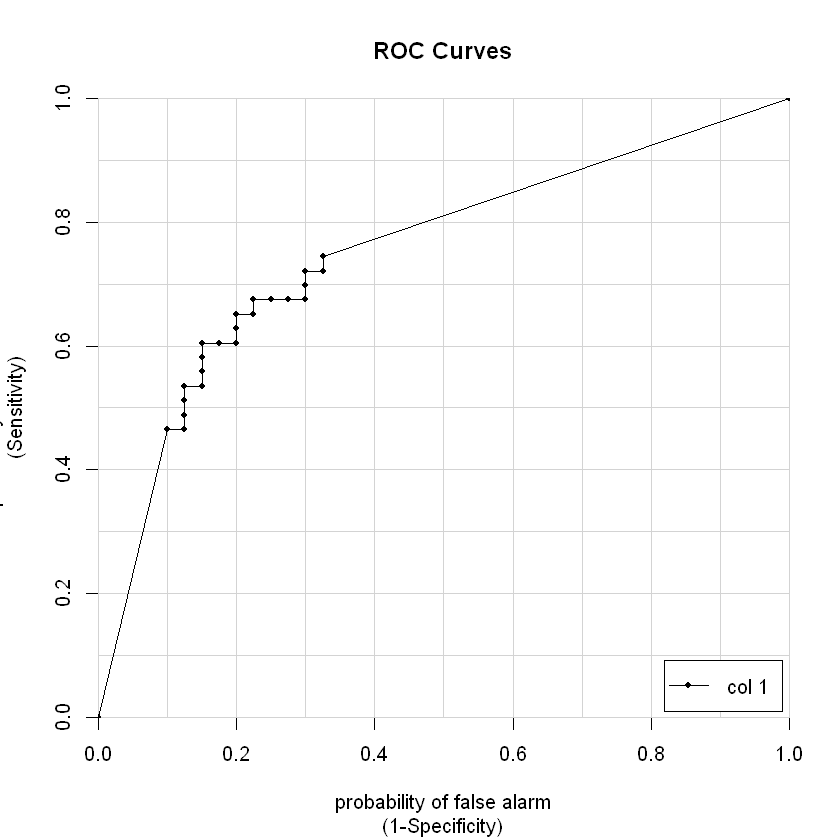

In [50]:
# Predict on test: p
p <- predict(model, newdata = test, type = "response")

# Make ROC curve
colAUC(p, test$Class, plotROC = TRUE)

In [51]:
# Customizing trainControl
# 
# As you saw in the video, area under the ROC curve is a very useful, 
# single-number summary of a model's ability to discriminate the positive from the negative class 
# (e.g. mines from rocks). An AUC of 0.5 is no better than random guessing, an AUC of 1.0 is a perfectly predictive model, 
# and an AUC of 0.0 is perfectly anti-predictive (which rarely happens).
# 
# This is often a much more useful metric than simply ranking models by their accuracy at a set threshold, 
# as different models might require different calibration steps (looking at a confusion matrix at each step) 
# to find the optimal classification threshold for that model.
# 
# You can use the trainControl() function in caret to use AUC (instead of acccuracy), 
# to tune the parameters of your models. The twoClassSummary() convenience function allows you to do this easily.
# 
# When using twoClassSummary(), be sure to always include the argument classProbs = TRUE 
# or your model will throw an error! 
# (You cannot calculate AUC with just class predictions. You need to have class probabilities as well.)
# 
# Instructions
# 
# Customize the trainControl object to use twoClassSummary rather than defaultSummary.
# Use 10-fold cross-validation.
# Be sure to tell trainControl() to return class probabilities.

In [52]:
# Create trainControl object: myControl
myControl <- trainControl(
method = "cv",
number = 10,
summaryFunction = twoClassSummary,
classProbs = TRUE, # IMPORTANT!
verboseIter = FALSE
)

In [53]:
# Using custom trainControl
# 
# Now that you have a custom trainControl object, it's easy to fit caret models 
# that use AUC rather than accuracy to tune and evaluate the model. 
# You can just pass your custom trainControl object to the train() function via the trControl argument, e.g.:
# 
# train(<standard arguments here>, trControl = myControl)
# This syntax gives you a convenient way to store a lot of custom modeling parameters and 
# then use them across multiple different calls to train(). 
# You will make extensive use of this trick in Chapter 5.
# 
# Instructions
# 
# Use train() to predict Class from all other variables in the Sonar data (that is, Class ~ .). 
# It should be a glm model (that is, set method to "glm") using your custom trainControl object, 
# myControl. Save the result to model.
# Print the model to the console and examine its output.

In [54]:
# Train glm with custom trainControl: model
model <- train(Class ~ ., data = Sonar,
method = "glm",
trControl = myControl)


# Print model to console
model

Generalized Linear Model 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 186, 187, 187, 187, 187, 188, ... 
Resampling results:

  ROC        Sens       Spec     
  0.7541414  0.7742424  0.7422222


# 3. Tuning model parameters to improve performance

In this chapter, you will use the train() function to tweak model parameters through cross-validation and grid search.

In [55]:
# Fit a random forest
# 
# As you saw in the video, random forest models are much more flexible than linear models, 
# and can model complicated nonlinear effects as well as automatically capture interactions between variables. 
# They tend to give very good results on real world data, so let's try one out on the wine quality dataset, 
# where the goal is to predict the human-evaluated quality of a batch of wine, 
# given some of the machine-measured chemical and physical properties of that batch.
# 
# Fitting a random forest model is exactly the same as fitting a generalized linear regression model, 
# as you did in the previous chapter. You simply change the method argument in the train function to be "ranger". 
# The ranger package is a rewrite of R's classic randomForest package and fits models much faster, 
# but gives almost exactly the same results. We suggest that all beginners use the ranger package for random forest modeling.
# 
# Instructions
# 
# Train a random forest called model on the wine quality dataset, wine, such that quality is 
# the response variable and all other variables are explanatory variables.
# Use method = "ranger".
# Use a tuneLength of 1.
# Use 5 CV folds.
# Print model to the console.

In [57]:
#install.packages('ranger')

In [58]:
library(ranger)
wine <- readRDS("wine_100.rds") 

In [59]:
# Fit random forest: model
model <- train(
quality ~.,
tuneLength = 1,
data = wine,
method = "ranger",
trControl = trainControl(method = "cv",
number = 5,
verboseIter = FALSE)
)
# Print model to console
model

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 81, 80, 80, 79, 80 
Resampling results across tuning parameters:

  splitrule   RMSE       Rsquared   MAE      
  variance    0.6626037  0.3012791  0.4977559
  extratrees  0.6823933  0.2807088  0.5131265

Tuning parameter 'mtry' was held constant at a value of 3
Tuning
 parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 3, splitrule = variance
 and min.node.size = 5.

In [60]:
# Try a longer tune length
# 
# Recall from the video that random forest models have a primary tuning parameter of mtry, 
# which controls how many variables are exposed to the splitting search routine at each split. 
# For example, suppose that a tree has a total of 10 splits and mtry = 2. 
# This means that there are 10 samples of 2 predictors each time a split is evaluated.
# 
# Use a larger tuning grid this time, but stick to the defaults provided by the train() function. 
# Try a tuneLength of 3, rather than 1, to explore some more potential models, 
# nd plot the resulting model using the plot function.
# 
# Instructions
# 
# Train a random forest model, model, using the wine dataset on the quality variable 
# with all other variables as explanatory variables. (This will take a few seconds to run, so be patient!)
# Use method = "ranger".
# Change the tuneLength to 3.
# Use 5 CV folds.
# Print model to the console.
# Plot the model after fitting it.

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 79, 80, 80, 81 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE       Rsquared   MAE      
   2    variance    0.6742438  0.2642438  0.5079130
   2    extratrees  0.7142613  0.1808283  0.5305116
   7    variance    0.6505718  0.2936282  0.4995250
   7    extratrees  0.6864215  0.2372753  0.5205419
  12    variance    0.6389208  0.3051476  0.4979301
  12    extratrees  0.6860589  0.2291082  0.5245878

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 12, splitrule = variance
 and min.node.size = 5.


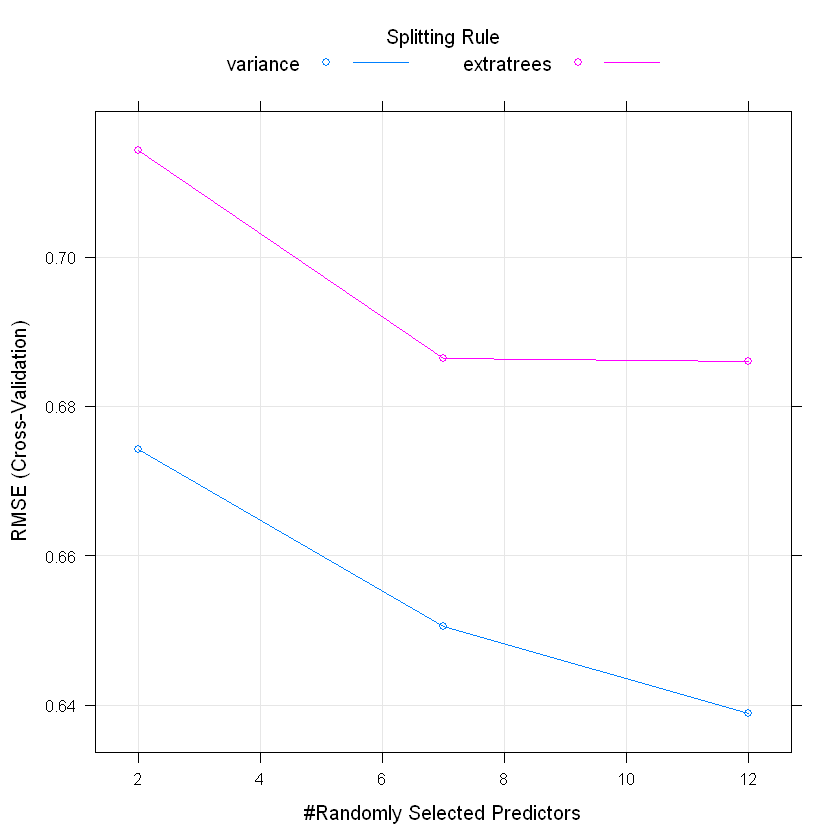

In [61]:
# Fit random forest: model
model <- train(
quality ~ .,
tuneLength = 3,
data = wine, method = "ranger",
trControl = trainControl(method = "cv", number = 5, verboseIter = FALSE)
)
# Print model to console
print(model)


# Plot model
plot(model)

In [62]:
# Fit a random forest with custom tuning
# 
# Now that you've explored the default tuning grids provided by the train() function, 
# let's customize your models a bit more.
# 
# You can provide any number of values for mtry, from 2 up to the number of columns in the dataset. 
# In practice, there are diminishing returns for much larger values of mtry, 
# so you will use a custom tuning grid that explores 2 simple models (mtry = 2 and mtry = 3) 
# as well as one more complicated model (mtry = 7).
# 
# Instructions 1/2
# 
# Define a custom tuning grid.
# Set the number of variables to possibly split at each node, .mtry, to a vector of 2, 3, and 7.
# Set the rule to split on, .splitrule, to "variance".
# Set the minimum node size, .min.node.size, to 5.

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 80, 80, 80, 80 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     0.6703098  0.3741231  0.5023300
  3     0.6695720  0.3655992  0.5079683
  7     0.6640879  0.3803438  0.5055400

Tuning parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 7, splitrule = variance
 and min.node.size = 5.

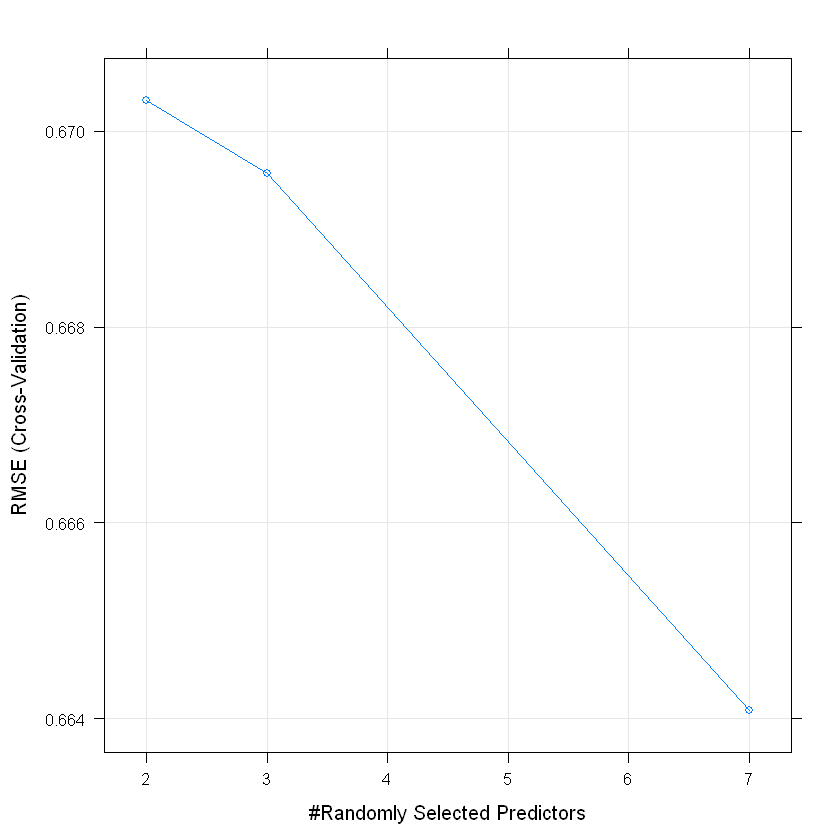

In [63]:
# Define the tuning grid: tuneGrid
tuneGrid <- data.frame(
.mtry = c(2, 3, 7),
.splitrule = "variance",
.min.node.size = 5
)
# Fit random forest: model
model <- train(
quality ~ .,
tuneGrid = tuneGrid,
data = wine,
method = "ranger",
trControl = trainControl(method = "cv",
number = 5,
verboseIter = FALSE)
)

# Print model to console
model

# Plot model
plot(model)

In [64]:
# Make a custom trainControl
# 
# The wine quality dataset was a regression problem, but now you are looking at a classification problem. 
# This is a simulated dataset based on the "don't overfit" competition on Kaggle a number of years ago.
# 
# Classification problems are a little more complicated than regression problems 
# because you have to provide a custom summaryFunction to the train() function 
# to use the AUC metric to rank your models. Start by making a custom trainControl, 
# as you did in the previous chapter. Be sure to set classProbs = TRUE, 
# therwise the twoClassSummary for summaryFunction will break.
# 
# Instructions
# 
# Make a custom trainControl called myControl for classification using the trainControl function.
# 
# Use 10 CV folds.
# Use twoClassSummary for the summaryFunction.
# Be sure to set classProbs = TRUE.

In [65]:
# Create custom trainControl: myControl
myControl <- trainControl(
method = "cv",
number = 10,
summaryFunction = twoClassSummary,
classProbs = TRUE, # IMPORTANT!
verboseIter = FALSE
)

In [66]:
# Fit glmnet with custom trainControl
# 
# Now that you have a custom trainControl object, fit a glmnet model to the "don't overfit" dataset. 
# Recall from the video that glmnet is an extension of the generalized linear regression model (or glm) 
# that places constraints on the magnitude of the coefficients to prevent overfitting. 
# This is more commonly known as "penalized" regression modeling and is a very useful technique 
# on datasets with many predictors and few values.
# 
# glmnet is capable of fitting two different kinds of penalized models, controlled by the alpha parameter:
# 
# Ridge regression (or alpha = 0)
# Lasso regression (or alpha = 1)
# You'll now fit a glmnet model to the "don't overfit" dataset using the defaults provided by the caret package.
# 
# Instructions
# 
# Train a glmnet model called model on the overfit data. 
# Use the custom trainControl from the previous exercise (myControl). 
# The variable y is the response variable and all other variables are explanatory variables.
# Print the model to the console.
# Use the max() function to find the maximum of the ROC statistic contained somewhere in model[["results"]].

In [68]:
#install.packages('glmnet')

In [70]:
library(data.table)
library(glmnet)

In [71]:
overfit <- fread("https://assets.datacamp.com/production/repositories/223/datasets/0bd5f7c30d9aec3e1f1fa677a19bee3af407453a/overfit.csv")

In [72]:
# Fit glmnet model: model
model <- train(y ~ .,
data = overfit,
method = "glmnet",
trControl = myControl)

# Print model to console
print(model)

# Print maximum ROC statistic
max(model[["results"]][["ROC"]])

glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 225, 225, 226, 224, 225, 225, ... 
Resampling results across tuning parameters:

  alpha  lambda        ROC        Sens  Spec     
  0.10   0.0001012745  0.4458333  0.00  0.9784420
  0.10   0.0010127448  0.4587862  0.00  0.9914855
  0.10   0.0101274483  0.4605978  0.00  0.9914855
  0.55   0.0001012745  0.4604167  0.00  0.9655797
  0.55   0.0010127448  0.4670290  0.00  0.9614130
  0.55   0.0101274483  0.4992754  0.00  0.9699275
  1.00   0.0001012745  0.4449275  0.05  0.9356884
  1.00   0.0010127448  0.4493659  0.00  0.9442029
  1.00   0.0101274483  0.5320652  0.00  0.9786232

ROC was used to select the optimal model using the largest value.
The final values used for the model were alpha = 1 and lambda = 0.01012745.


[1] 0.5320652

In [73]:
# glmnet with custom trainControl and tuning
# 
# As you saw in the video, the glmnet model actually fits many models at once 
# (one of the great things about the package). You can exploit this by passing a large number of lambda values, 
# which control the amount of penalization in the model. train() is smart enough to only fit one model 
# per alpha value and pass all of the lambda values at once for simultaneous fitting.
# 
# My favorite tuning grid for glmnet models is:
# 
# expand.grid(
#   alpha = 0:1,
#   lambda = seq(0.0001, 1, length = 100)
# )
# This grid explores a large number of lambda values (100, in fact), from a very small one to a very large one. 
# (You could increase the maximum lambda to 10, but in this exercise 1 is a good upper bound.)
# 
# If you want to explore fewer models, you can use a shorter lambda sequence. For example, 
# lambda = seq(0.0001, 1, length = 10) would fit 10 models per value of alpha.
# 
# You also look at the two forms of penalized models with this tuneGrid: ridge regression and lasso regression. 
# alpha = 0 is pure ridge regression, and alpha = 1 is pure lasso regression. 
# You can fit a mixture of the two models (i.e. an elastic net) using an alpha between 0 and 1. 
# For example, alpha = 0.05 would be 95% ridge regression and 5% lasso regression.
# 
# In this problem you'll just explore the 2 extremes – pure ridge and pure lasso regression – 
# for the purpose of illustrating their differences.
# 
# Instructions
# 
# Train a glmnet model on the overfit data such that y is the response variable and all 
# other variables are explanatory variables. Make sure to use your custom trainControl from 
# the previous exercise (myControl). Also, use a custom tuneGrid to explore 
# alpha = 0:1 and 20 values of lambda between 0.0001 and 1 per value of alpha.
# Print model to the console.
# Print the max() of the ROC statistic in model[["results"]]. 
# You can access it using model[["results"]][["ROC"]].

In [74]:
# Train glmnet with custom trainControl and tuning: model
model <- train(
y ~ ., data = overfit,
tuneGrid = expand.grid(alpha = 0:1,
lambda = seq(0.0001, 1, length = 20)),
method = "glmnet",
trControl = myControl
)

# Print model to console
model

# Print maximum ROC statistic
max(model[["results"]][["ROC"]])

glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 225, 225, 224, 225, 224, 225, ... 
Resampling results across tuning parameters:

  alpha  lambda      ROC        Sens  Spec     
  0      0.00010000  0.4432065  0     0.9914855
  0      0.05272632  0.4458333  0     0.9956522
  0      0.10535263  0.4586051  0     1.0000000
  0      0.15797895  0.4737319  0     1.0000000
  0      0.21060526  0.4846014  0     1.0000000
  0      0.26323158  0.4866848  0     1.0000000
  0      0.31585789  0.4910326  0     1.0000000
  0      0.36848421  0.4952899  0     1.0000000
  0      0.42111053  0.5018116  0     1.0000000
  0      0.47373684  0.5038949  0     1.0000000
  0      0.52636316  0.5059783  0     1.0000000
  0      0.57898947  0.5059783  0     1.0000000
  0      0.63161579  0.5059783  0     1.0000000
  0      0.68424211  0.5059783  0     1.0000000
  0      0.73686842  0.5059783  0     1.0000000

[1] 0.5362319

# 4. Preprocessing your data

In this chapter, you will practice using train() to preprocess data before fitting models, improving your ability to making accurate predictions.

In [75]:
# Apply median imputation
# 
# In this chapter, you'll be using a version of the Wisconsin Breast Cancer dataset. 
# This dataset presents a classic binary classification problem: 50% of the samples are benign, 50% are malignant, 
# and the challenge is to identify which are which.
# 
# This dataset is interesting because many of the predictors contain missing values and most rows of 
# the dataset have at least one missing value. This presents a modeling challenge, 
# because most machine learning algorithms cannot handle missing values out of the box. 
# For example, your first instinct might be to fit a logistic regression model to this data, 
# but prior to doing this you need a strategy for handling the NAs.
# 
# Fortunately, the train() function in caret contains an argument called preProcess, 
# which allows you to specify that median imputation should be used to fill in the missing values. 
# In previous chapters, you created models with the train() function using formulas such as y ~ .. 
# An alternative way is to specify the x and y arguments to train(), 
# where x is an object with samples in rows and features in columns 
# and y is a numeric or factor vector containing the outcomes. 
# Said differently, x is a matrix or data frame that contains the whole dataset 
# you'd use for the data argument to the lm() call, for example, but excludes the response variable column; 
# y is a vector that contains just the response variable column.
# 
# For this exercise, the argument x to train() is loaded in your workspace as breast_cancer_x and y as breast_cancer_y.
# 
# Instructions
# 
# Use the train() function to fit a glm model called median_model to the breast cancer dataset. 
# Use preProcess = "medianImpute" to handle the missing values.
# Print median_model to the console.

In [76]:
load('BreastCancer.RData')

In [77]:
# Create custom trainControl: myControl
myControl <- trainControl(
method = "cv",
number = 10,
summaryFunction = twoClassSummary,
classProbs = TRUE, # IMPORTANT!
verboseIter = FALSE
)

In [78]:
# Apply median imputation: model
model <- train(
x = breast_cancer_x, y = breast_cancer_y,
method = "glm",
trControl = myControl,
preProcess = "medianImpute"
)
# Print model to console
model

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 628, 629, 629, 629, 630, ... 
Resampling results:

  ROC        Sens       Spec  
  0.9918603  0.9695652  0.9375


In [79]:
# Use KNN imputation
# 
# In the previous exercise, you used median imputation to fill in missing values in the breast cancer dataset,
# but that is not the only possible method for dealing with missing data.
# 
# An alternative to median imputation is k-nearest neighbors, or KNN, imputation. 
# This is a more advanced form of imputation where missing values are replaced with values from other rows 
# that are similar to the current row. While this is a lot more complicated to implement in practice 
# than simple median imputation, it is very easy to explore in caret using the preProcess argument to train(). 
# You can simply use preProcess = "knnImpute" to change the method of imputation used prior to model fitting.
# 
# Instructions
# 
# breast_cancer_x and breast_cancer_y are loaded in your workspace.
# 
# Use the train() function to fit a glm model called knn_model to the breast cancer dataset.
# Use KNN imputation to handle missing values.

In [81]:
#install.packages("RANN")

In [82]:
library(RANN)

In [83]:
# Apply KNN imputation
knn_model <- train(
x = breast_cancer_x, y = breast_cancer_y,
method = "glm",
trControl = myControl,
preProcess = "knnImpute"
)

# Print knn_model to console
knn_model

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: nearest neighbor imputation (9), centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 630, 629, 628, 629, 630, ... 
Resampling results:

  ROC        Sens       Spec 
  0.9924569  0.9714493  0.942


In [144]:
#install.packages("BiocManager")

In [145]:
# BiocManager::install("clusterProfiler")#, version = "3.8")

In [146]:
#library(clusterProfiler)

In [143]:
# dotplot(resamples, metric = "ROC")
# 
# median_model <- model
# knn_model <- model2
# ANS <- resamples(list(median_model, knn_model))
# dotplot(ANS, metric = "ROC")

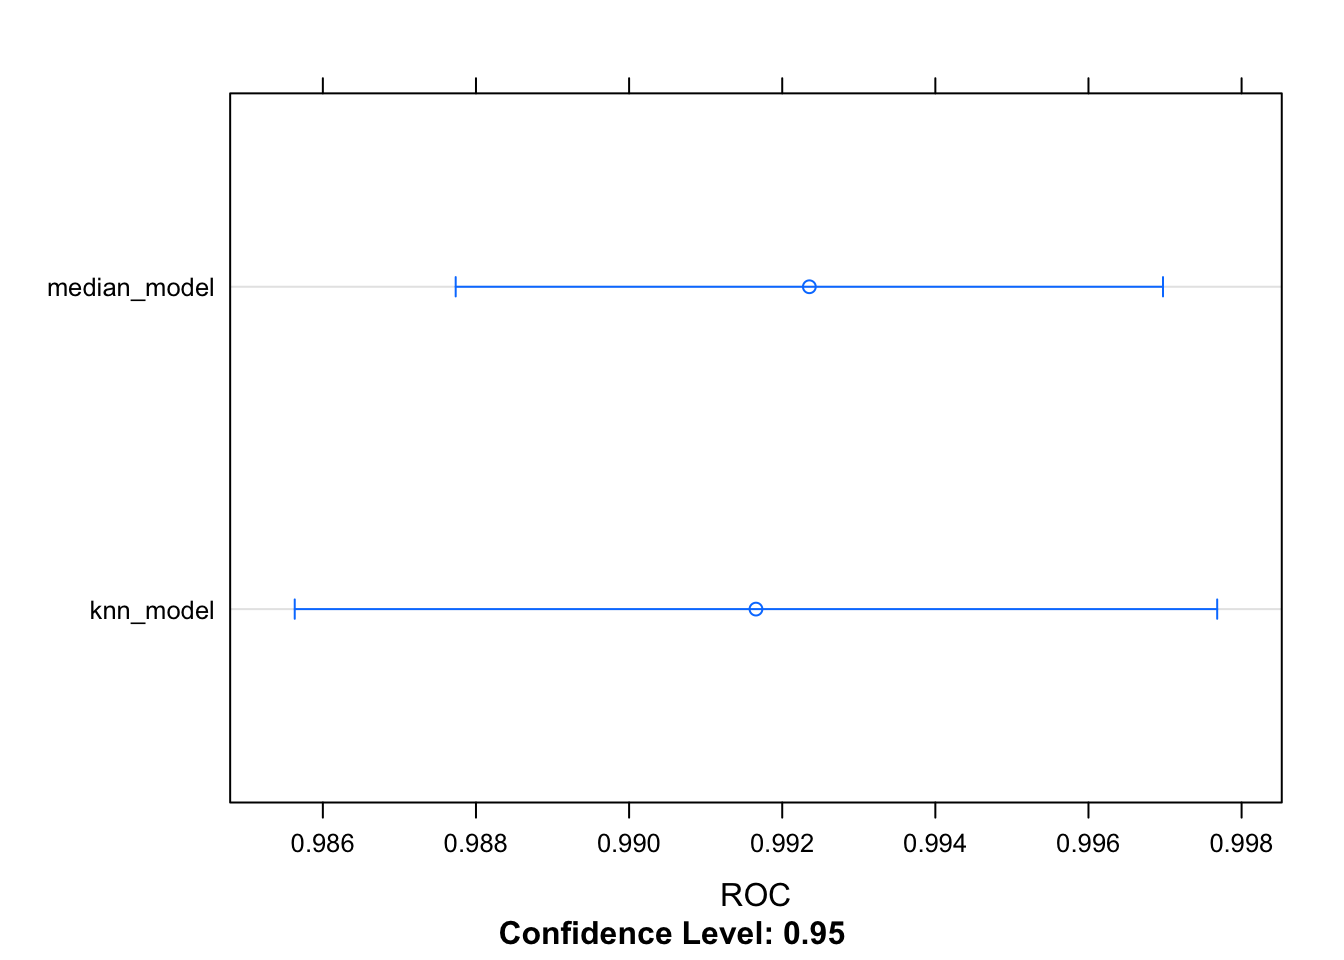

In [147]:
display_png(file="knnvsmedianmodel.png") 

In [150]:
# Combining preprocessing methods
# 
# The preProcess argument to train() doesn't just limit you to imputing missing values. 
# It also includes a wide variety of other preProcess techniques to make your life as a data scientist much easier. 
# You can read a full list of them by typing ?preProcess and reading the help page for this function.
# 
# One set of preprocessing functions that is particularly useful 
# for fitting regression models is standardization: centering and scaling. 
# You first center by subtracting the mean of each column from each value in that column, 
# then you scale by dividing by the standard deviation.
# 
# Standardization transforms your data such that for each column, 
# the mean is 0 and the standard deviation is 1. 
# This makes it easier for regression models to find a good solution.
# 
# Instructions 1/2
# 1
# breast_cancer_x and breast_cancer_y are loaded in your workspace. 
# Fit a logistic regression model using median imputation called model 
# to the breast cancer data, then print it to the console.

In [151]:
# Fit glm with median imputation: model1
model1 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess =  c("medianImpute")
)

# Print model
model1

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 630, 629, 629, 629, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9902206  0.9716908  0.9376667


In [152]:
# Fit glm with median imputation and standardization: model2
model2 <- train(
x = breast_cancer_x, y = breast_cancer_y,
method = "glm",
trControl = myControl,
preProcess = c("medianImpute", "center", "scale")
)

# Print model2
model2

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9), centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 630, 629, 629, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9928341  0.9695652  0.9461667


In [153]:
# Remove near zero variance predictors
# 
# As you saw in the video, for the next set of exercises, you'll be using the blood-brain dataset. 
# This is a biochemical dataset in which the task is to predict 
# the following value for a set of biochemical compounds:
# 
# log((concentration of compound in brain) /
#       (concentration of compound in blood))
# This gives a quantitative metric of the compound's ability to cross the blood-brain barrier, 
# and is useful for understanding the biological properties of that barrier.
# 
# One interesting aspect of this dataset is that it contains many variables 
# and many of these variables have extemely low variances. 
# This means that there is very little information in these variables because 
# they mostly consist of a single value (e.g. zero).
# 
# Fortunately, caret contains a utility function called nearZeroVar() 
# for removing such variables to save time during modeling.
# 
# nearZeroVar() takes in data x, then looks at the ratio of the most common value 
# to the second most common value, freqCut, and the percentage of distinct values 
# out of the number of total samples, uniqueCut. 
# By default, caret uses freqCut = 19 and uniqueCut = 10, which is fairly conservative. 
# I like to be a little more aggressive and use freqCut = 2 and uniqueCut = 20 when calling nearZeroVar().
# 
# Instructions
# 
# bloodbrain_x and bloodbrain_y are loaded in your workspace.
# 
# Identify the near zero variance predictors by running nearZeroVar() on the blood-brain dataset. 
# Store the result as an object called remove_cols. Use freqCut = 2 and uniqueCut = 20 in the call to nearZeroVar().
# Use names() to create a vector containing all column names of bloodbrain_x. Call this all_cols.
# Make a new data frame called bloodbrain_x_small with the near-zero variance variables removed. 
# Use setdiff() to isolate the column names that you wish to keep (i.e. that you don't want to remove.)

In [154]:
load('BloodBrain.RData')

In [155]:
# Identify near zero variance predictors: remove_cols
remove_cols <- nearZeroVar(bloodbrain_x, names = TRUE, 
                           freqCut = 2, uniqueCut = 20)
# Get all column names from bloodbrain_x: all_cols
all_cols<-names(bloodbrain_x)
# Remove from data: bloodbrain_x_small
bloodbrain_x_small <- bloodbrain_x[ , setdiff(all_cols, remove_cols)]

In [160]:
# Fit model on reduced blood-brain data
# 
# Now that you've reduced your dataset, you can fit a glm model to it using the train() function. 
# This model will run faster than using the full dataset and will yield very similar predictive accuracy.
# 
# Furthermore, zero variance variables can cause problems with cross-validation 
# (e.g. if one fold ends up with only a single unique value for that variable), 
# so removing them prior to modeling means you are less likely to get errors during the fitting process.
# 
# Instructions
# bloodbrain_x, bloodbrain_y, remove, and bloodbrain_x_small are loaded in your workspace.
# 
# Fit a glm model using the train() function and the reduced blood-brain dataset you created in the previous exercise.
# Print the result to the console.

In [161]:
# Fit model on reduced data: model
model <- train(x = bloodbrain_x_small, y = bloodbrain_y, method = "glm")

# Print model to console
model

Generalized Linear Model 

208 samples
112 predictors

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE      Rsquared    MAE     
  1.551454  0.09942917  1.027512


In [162]:
# Using PCA as an alternative to nearZeroVar()
# 
# An alternative to removing low-variance predictors is to run PCA on your dataset. 
# This is sometimes preferable because it does not throw out all of your data: 
# many different low variance predictors may end up combined into one high variance PCA variable, 
# which might have a positive impact on your model's accuracy.
# 
# This is an especially good trick for linear models: 
# the pca option in the preProcess argument will center and scale your data, 
# combine low variance variables, and ensure that all of your predictors are orthogonal. 
# This creates an ideal dataset for linear regression modeling, and can often improve the accuracy of your models.
# 
# Instructions
# 
# bloodbrain_x and bloodbrain_y are loaded in your workspace.
# 
# Fit a glm model to the full blood-brain dataset using the "pca" option to preProcess.
# Print the model to the console and inspect the result. 

In [163]:
# Fit glm model using PCA: model
model <- train(
  x = bloodbrain_x, y = bloodbrain_y,
  method = "glm", preProcess = "pca"
)
# Print model to console
model

Generalized Linear Model 

208 samples
132 predictors

Pre-processing: principal component signal extraction (132), centered
 (132), scaled (132) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.612431  0.4055253  0.4613599


# 5. Selecting models: a case study in churn prediction

In the final chapter of this course, you'll learn how to use resamples() to compare multiple models and select (or ensemble) the best one(s).

In [164]:
# Make custom train/test indices
# 
# As you saw in the video, for this chapter you will focus on a real-world dataset 
# that brings together all of the concepts discussed in the previous chapters.
# 
# The churn dataset contains data on a variety of telecom customers and 
# the modeling challenge is to predict which customers will cancel their service (or churn).
# 
# In this chapter, you will be exploring two different types of predictive models: 
# glmnet and rf, so the first order of business is to create a reusable trainControl object 
# you can use to reliably compare them.
# 
# Instructions
# 
# churn_x and churn_y are loaded in your workspace.
# 
# Use createFolds() to create 5 CV folds on churn_y, your target variable for this exercise.
# Pass them to trainControl() to create a reusable trainControl for comparing models.

In [165]:
load('Churn.RData')

In [166]:
# Create custom indices: myFolds
myFolds <- createFolds(churn_y, k = 5)
# Create reusable trainControl object: myControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)

In [167]:
# Fit the baseline model
# 
# Now that you have a reusable trainControl object called myControl, 
# you can start fitting different predictive models to your churn dataset and evaluate their predictive accuracy.
# 
# You'll start with one of my favorite models, glmnet, 
# which penalizes linear and logistic regression models on 
# the size and number of coefficients to help prevent overfitting.
# 
# Instructions
# Fit a glmnet model to the churn dataset called model_glmnet. 
# Make sure to use myControl, which you created in the first exercise and 
# is available in your workspace, as the trainControl object.

In [168]:
# Fit glmnet model: model_glmnet
model_glmnet <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "glmnet",
  trControl = myControl
)

+ Fold1: alpha=0.10, lambda=0.01821 
- Fold1: alpha=0.10, lambda=0.01821 
+ Fold1: alpha=0.55, lambda=0.01821 
- Fold1: alpha=0.55, lambda=0.01821 
+ Fold1: alpha=1.00, lambda=0.01821 
- Fold1: alpha=1.00, lambda=0.01821 
+ Fold2: alpha=0.10, lambda=0.01821 
- Fold2: alpha=0.10, lambda=0.01821 
+ Fold2: alpha=0.55, lambda=0.01821 
- Fold2: alpha=0.55, lambda=0.01821 
+ Fold2: alpha=1.00, lambda=0.01821 
- Fold2: alpha=1.00, lambda=0.01821 
+ Fold3: alpha=0.10, lambda=0.01821 
- Fold3: alpha=0.10, lambda=0.01821 
+ Fold3: alpha=0.55, lambda=0.01821 
- Fold3: alpha=0.55, lambda=0.01821 
+ Fold3: alpha=1.00, lambda=0.01821 
- Fold3: alpha=1.00, lambda=0.01821 
+ Fold4: alpha=0.10, lambda=0.01821 
- Fold4: alpha=0.10, lambda=0.01821 
+ Fold4: alpha=0.55, lambda=0.01821 
- Fold4: alpha=0.55, lambda=0.01821 
+ Fold4: alpha=1.00, lambda=0.01821 
- Fold4: alpha=1.00, lambda=0.01821 
+ Fold5: alpha=0.10, lambda=0.01821 
- Fold5: alpha=0.10, lambda=0.01821 
+ Fold5: alpha=0.55, lambda=0.01821 
-

In [171]:
# Random forest with custom trainControl
# 
# Another one of my favorite models is the random forest, 
# which combines an ensemble of non-linear decision trees into 
# a highly flexible (and usually quite accurate) model.
# 
# Rather than using the classic randomForest package, 
# you'll be using the ranger package, which is a re-implementation of randomForest 
# that produces almost the exact same results, but is faster, more stable, and uses less memory. 
# I highly recommend it as a starting point for random forest modeling in R.
# 
# Instructions
# 
# churn_x and churn_y are loaded in your workspace.
# 
# Fit a random forest model to the churn dataset. 
# Be sure to use myControl as the trainControl like you've done before and implement the "ranger" method.

In [172]:
# Fit random forest: model_rf
model_rf <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "ranger",
  trControl = myControl
)

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=36, min.node.size=1, splitrule=gini 
- Fold1: mtry=36, min.node.size=1, splitrule=gini 
+ Fold1: mtry=70, min.node.size=1, splitrule=gini 
- Fold1: mtry=70, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=36, min.node.size=1, splitrule=gini 
- Fold2: mtry=36, min.node.size=1, splitrule=gini 
+ Fold2: mtry=70, min.node.size=1, splitrule=gini 
- Fold2: mtry=70, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

In [169]:
# Create a resamples object
# 
# Now that you have fit two models to the churn dataset, 
# it's time to compare their out-of-sample predictions 
# and choose which one is the best model for your dataset.
# 
# You can compare models in caret using the resamples() function, 
# provided they have the same training data and use 
# the same trainControl object with preset cross-validation folds. resamples() 
# takes as input a list of models and can be used to compare dozens of models at once (though in this case you are only comparing two models).
# 
# Instructions
# 
# model_glmnet and model_rf are loaded in your workspace.
# 
# Create a list() containing the glmnet model as item1 and the ranger model as item2.
# Pass this list to the resamples() function and save the resulting object as resamples.
# Summarize the results by calling summary() on resamples.

In [173]:
# Create model_list
model_list <- list(item1 = model_glmnet, item2 = model_rf)
# Pass model_list to resamples(): resamples
resamples<-resamples(model_list)
# Summarize the results
summary(resamples)


Call:
summary.resamples(object = resamples)

Models: item1, item2 
Number of resamples: 5 

ROC 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.4503448 0.5506189 0.5749451 0.5665861 0.6197802 0.6372414    0
item2 0.5721839 0.6953846 0.7123077 0.6862149 0.7143015 0.7368966    0

Sens 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.8793103 0.9022989 0.9200000 0.9254187 0.9597701 0.9657143    0
item2 0.9655172 0.9942529 0.9942857 0.9908112 1.0000000 1.0000000    0

Spec 
            Min.    1st Qu.    Median      Mean 3rd Qu. Max. NA's
item1 0.07692308 0.07692308 0.1153846 0.1178462    0.12 0.20    0
item2 0.00000000 0.00000000 0.0000000 0.0160000    0.00 0.08    0


In [174]:
# Create a box-and-whisker plot
# 
# caret provides a variety of methods to use for comparing models. 
# All of these methods are based on the resamples() function. 
# My favorite is the box-and-whisker plot, which allows you to compare 
# the distribution of predictive accuracy (in this case AUC) for the two models.
# 
# In general, you want the model with the higher median AUC, 
# as well as a smaller range between min and max AUC.
# 
# You can make this plot using the bwplot() function, 
# which makes a box and whisker plot of the model's out of sample scores. 
# Box and whisker plots show the median of each distribution as a line and 
# the interquartile range of each distribution as a box around the median line. 
# You can pass the metric = "ROC" argument to the bwplot() function to show a plot of 
# the model's out-of-sample ROC scores and choose the model with the highest median ROC.
# 
# If you do not specify a metric to plot, bwplot() will automatically plot 3 of them.
# 
# Instructions
# 
# Pass the resamples object to the bwplot() function to make a box-and-whisker plot. 
# Look at the resulting plot and note which model has the higher median ROC statistic. 
# Be sure to specify which metric you want to plot.

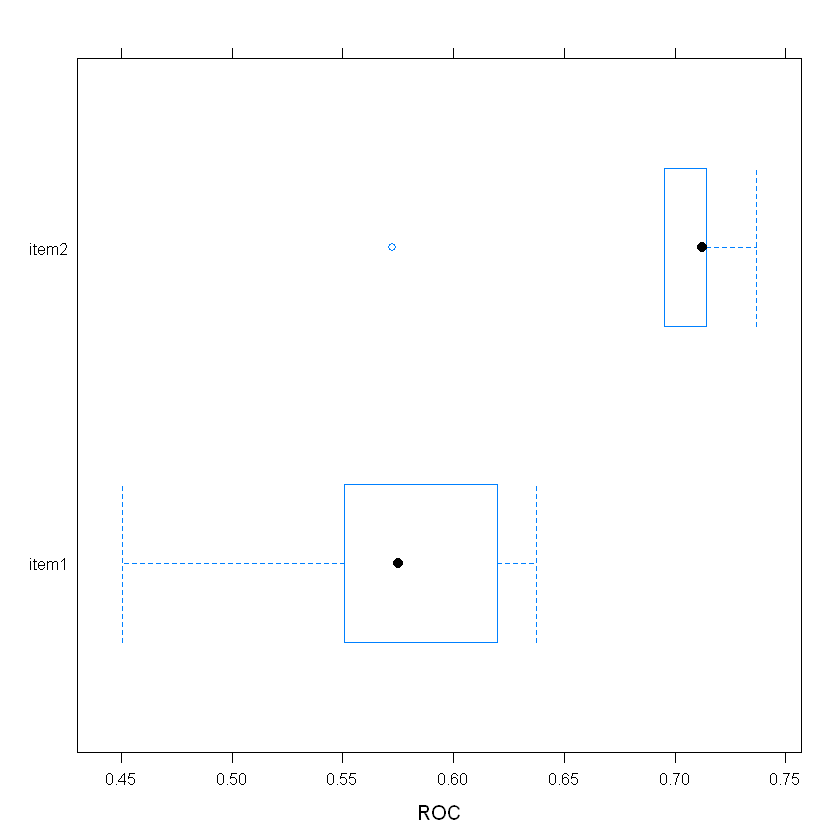

In [175]:
# Create bwplot
bwplot(resamples, metric = "ROC")

In [177]:
# Create a scatterplot
# 
# Another useful plot for comparing models is the scatterplot, 
# also known as the xy-plot. This plot shows you how similar 
# the two models' performances are on different folds.
# 
# It's particularly useful for identifying if one model is consistently better than 
# the other across all folds, or if there are situations when 
# the inferior model produces better predictions on a particular subset of the data.
# 
# Instructions
# 
# Pass the resamples object to the xyplot() function. 
# Look at the resulting plot and note how similar 
# the two models' predictions are (or are not) on the different folds. 
# Be sure to specify which metric you want to plot.

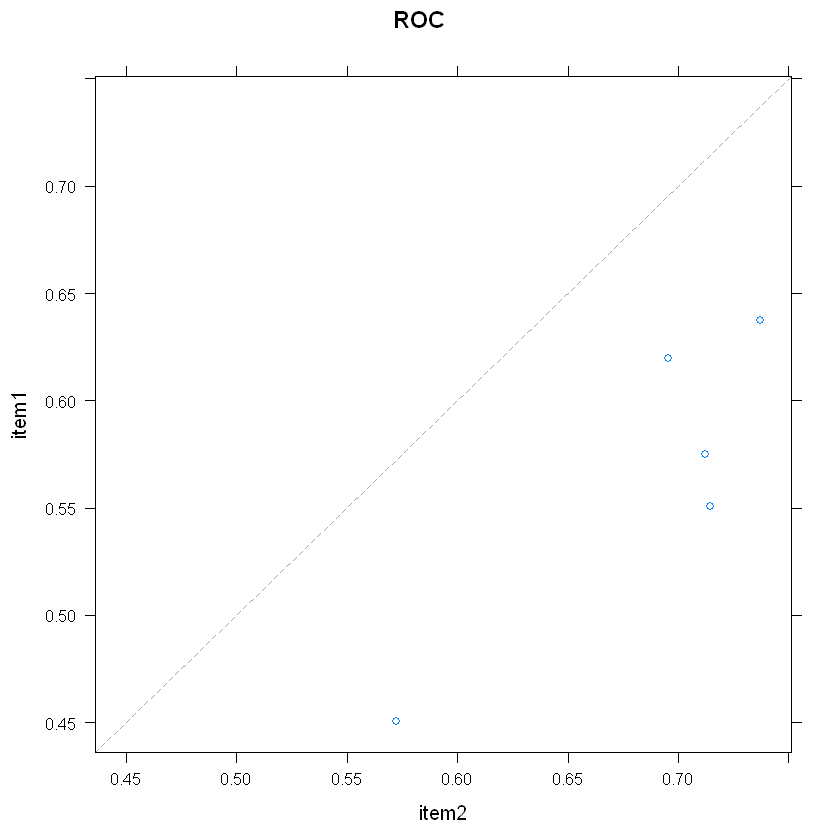

In [178]:
# Create xyplot
xyplot(resamples,metric="ROC")

In [ ]:
Ensembling models
That concludes the course! As a teaser for a future course on making ensembles of caret models, I'll show you how to fit a stacked ensemble of models using the caretEnsemble package.

caretEnsemble provides the caretList() function for creating multiple caret models at once on the same dataset, using the same resampling folds. You can also create your own lists of caret models.

In this exercise, I've made a caretList for you, containing the glmnet and ranger models you fit on the churn dataset. Use the caretStack() function to make a stack of caret models, with the two sub-models (glmnet and ranger) feeding into another (hopefully more accurate!) caret model.

Instructions
100 XP
Instructions
100 XP
Call the caretStack() function with two arguments, model_list and method = "glm", to ensemble the two models using a logistic regression. Store the result as stack.
Summarize the resulting model with the summary() function.

In [180]:
# install.packages('caretEnsemble')

In [182]:
library(caretEnsemble)
models <- caretList(
x = churn_x, y = churn_y,
metric = "ROC",
trControl = myControl,
methodList = c("glmnet", "ranger")
)

+ Fold1: alpha=0.10, lambda=0.01821 
- Fold1: alpha=0.10, lambda=0.01821 
+ Fold1: alpha=0.55, lambda=0.01821 
- Fold1: alpha=0.55, lambda=0.01821 
+ Fold1: alpha=1.00, lambda=0.01821 
- Fold1: alpha=1.00, lambda=0.01821 
+ Fold2: alpha=0.10, lambda=0.01821 
- Fold2: alpha=0.10, lambda=0.01821 
+ Fold2: alpha=0.55, lambda=0.01821 
- Fold2: alpha=0.55, lambda=0.01821 
+ Fold2: alpha=1.00, lambda=0.01821 
- Fold2: alpha=1.00, lambda=0.01821 
+ Fold3: alpha=0.10, lambda=0.01821 
- Fold3: alpha=0.10, lambda=0.01821 
+ Fold3: alpha=0.55, lambda=0.01821 
- Fold3: alpha=0.55, lambda=0.01821 
+ Fold3: alpha=1.00, lambda=0.01821 
- Fold3: alpha=1.00, lambda=0.01821 
+ Fold4: alpha=0.10, lambda=0.01821 
- Fold4: alpha=0.10, lambda=0.01821 
+ Fold4: alpha=0.55, lambda=0.01821 
- Fold4: alpha=0.55, lambda=0.01821 
+ Fold4: alpha=1.00, lambda=0.01821 
- Fold4: alpha=1.00, lambda=0.01821 
+ Fold5: alpha=0.10, lambda=0.01821 
- Fold5: alpha=0.10, lambda=0.01821 
+ Fold5: alpha=0.55, lambda=0.01821 
-

In [183]:
# Create ensemble model: stack
stack <- caretStack(all.models = models, method = "glm")

# Look at summary
summary(stack)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4427  -0.4925  -0.4376  -0.4149   2.2712  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7804     0.5473   3.253  0.00114 ** 
glmnet        1.2702     0.4921   2.581  0.00985 ** 
ranger       -5.4901     0.8702  -6.309 2.81e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 765.13  on 999  degrees of freedom
Residual deviance: 721.46  on 997  degrees of freedom
AIC: 727.46

Number of Fisher Scoring iterations: 4


# END OF THIS EXCELLENT COURSE

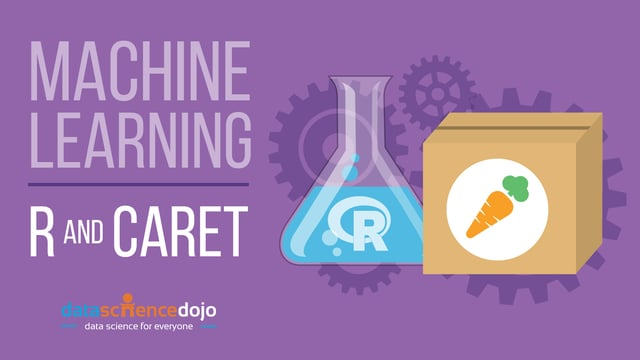

In [184]:
display_png(file="r&c.jpg") 